In [86]:

#SETTING UP AND CLEANING CODE


In [ ]:
#libraries to assist data analysis
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [87]:
#checking correct directory
import os
os. getcwd ()

'/Users/willsaliba/Documents/Projects/DataAnal'

In [88]:
#reading in huge csv then only taking first 50,000 rows (specifiying column 35 data type)
df = pd.read_csv('openpowerlifting.csv', nrows=50000, dtype={35: str})

In [89]:
#reading in csv file.
df = pd.read_csv('openpowerlifting.csv', nrows=50000, dtype={35: str})
#file only contains first 30k rows from original, to reduce load on my weak laptop (hire me and I'll buy a better one)
df.shape

(50000, 37)

In [90]:
#removing unused paramters
df = df.drop(columns=['AgeClass', 'Division', 'Glossbrenner','IPFPoints','Federation', 'Date', 'MeetCountry', 
                      'MeetState', 'McCulloch', 'Tested', 'MeetName','Country', 'Place', 'Wilks', 'WeightClassKg'])
df = df.drop(columns=['Squat1Kg', 'Squat2Kg', 'Squat3Kg','Squat4Kg','Bench1Kg','Bench2Kg','Bench3Kg', 'Bench4Kg',
                      'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg'])
df.head(2)

,Name,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,Abbie Murphy,F,SBD,Wraps,29.0,59.8,105.0,55.0,130.0,290.0
1,Abbie Tuong,F,SBD,Wraps,29.0,58.5,120.0,67.5,145.0,332.5


In [91]:
#removing rows with invalid entries
df = df[df['Sex'].isin(['M', 'F'])]
df = df[df['Equipment'].isin(['Raw', 'Wraps', 'Single-ply', 'Multi-ply'])]
df = df[df['Event'].isin(['SBD'])]
df = df.dropna(subset=['Age','BodyweightKg','Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg'])
df.shape

(32351, 10)

In [103]:
#rounding rows down to 30,000 and saving because 30,000 is a nicer number then 32,351
df.iloc[:30000].to_csv('powerliftingdata.csv', index=False)
df = pd.read_csv('powerliftingdata.csv')

In [104]:

#BEGIN GRAPH GENERATED USING VALID DATA 


In [105]:
#seperating male and female datasets
female_df = df[df.Sex == 'F']
male_df = df[df.Sex == 'M']

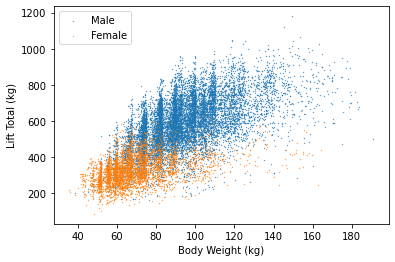

In [106]:
#creating graph for Lift Total vs Age
plt.scatter(male_df.BodyweightKg, male_df.TotalKg, .1)
plt.scatter(female_df.BodyweightKg, female_df.TotalKg, .1)
plt.xlabel("Body Weight (kg)")
plt.ylabel("Lift Total (kg)")
plt.legend(["Male", "Female"])
plt.show()